# **FINAL PROJECT 3; ENSEMBLE**

**Disusun oleh kelompok 8**

```
1. Rijal Muhammad Farizky
2. Diva Nabila
```

# **Project Overview**

**LATAR BELAKANG**

Dengan dataset yang diberikan yaitu "heart_failure_clinical_records_dataset.csv" kita dapat `menganalisis, memahami dan memprediksi faktor-faktor yang mempengaruhi risiko kematian pada pasien akibat gagal jantung`. Dataset ini memberikan informasi klinis yang luas, termasuk usia, jenis kelamin, kadar kreatinin, serum dan parameter lain yang mempengaruhi kondisi kesehatan. 

**TUJUAN**

- Mampu memahami konsep Classification dengan Ensemble Model 
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model 
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# **Import Pustaka**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer,TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pickle import load,dump


# **Data Loading**

In [2]:
# Mengimport Data 
df = pd.read_csv('D:/heart_failure_clinical_records_dataset.csv', sep=',')

# Menampilkan dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Melihat ukuran dataset
df.shape

(299, 13)

In [4]:
# Melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan hasil diatas didapatkan bahwa dataset tersebut tidak ada missing values pada semua atributnya. Maka dari itu, coba kita lihat statistik deskriptif dari datasetnya

In [5]:
# Melihat statistik deskriptif dari dataset agar tau kondisi dataset apakah perlu ditanganin atau tidak
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Berdasarkan hasil diatas tidak ditemukan keanehan pada dataset, maka dari itu dapat dilanjutkan ke tahap selanjutnya.

# **Data Cleaning**

In [6]:
# Check missing values 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Semua variabel tidak ditemukan missing values

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Terdapat beberapa atribut yang berupa kategori yaitu anemia, diabetes, high_blood_pressure, sex dan smoking dan sisanya merupakan data numerik. maka dari itu kita kategorikan untuk memudahkan analisis

In [8]:
# Memisahkan data kategori dan data numerik
cat_cols = ['diabetes','high_blood_pressure','sex','smoking','anaemia']
num_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

# Mengubah data kategori menjadi object
for col in cat_cols:
    df[col] = df[col].astype('object')


Dengan mengubah data menjadi object itu memberi tahu bahwa sebenarnya atribut tersebut bersifat kategorik

<Axes: >

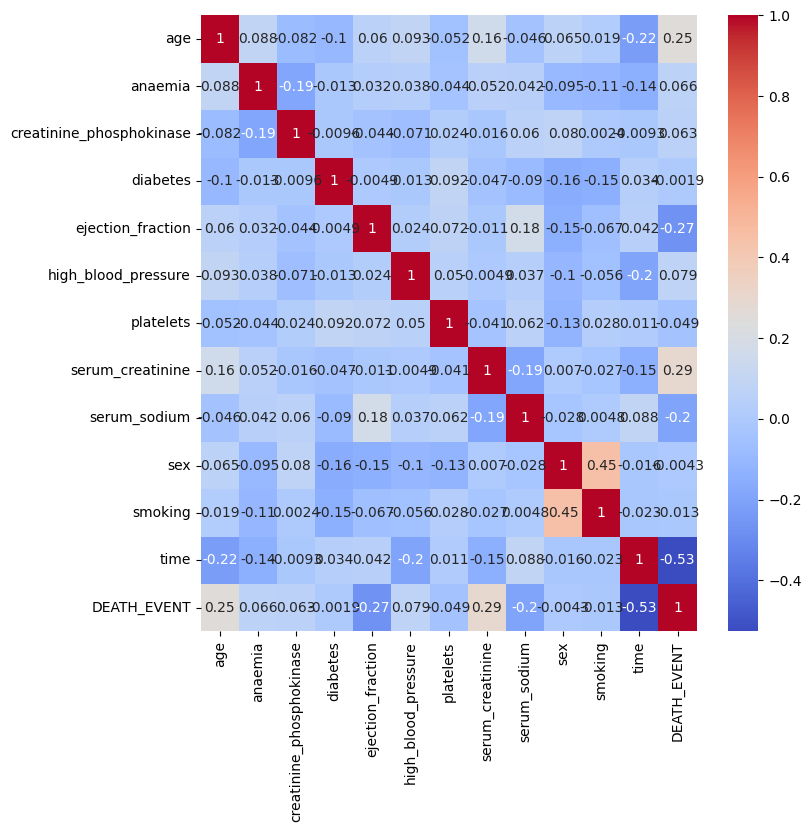

In [9]:
#heatmap correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Berdasarkan hasil heatmap diatas, dapat disimpulkan bahwa tidak ada korelasi yang kuat antar variabelnya, maka dari itu tidak perlu ada penghapusan pada atribut yang ada.

# **Exploratory Data Analysis**

Melihat distribusi pada data dari masing-masing atribut numerik, jika terdapat yang unik dapat ditelusuri lebih lanjut

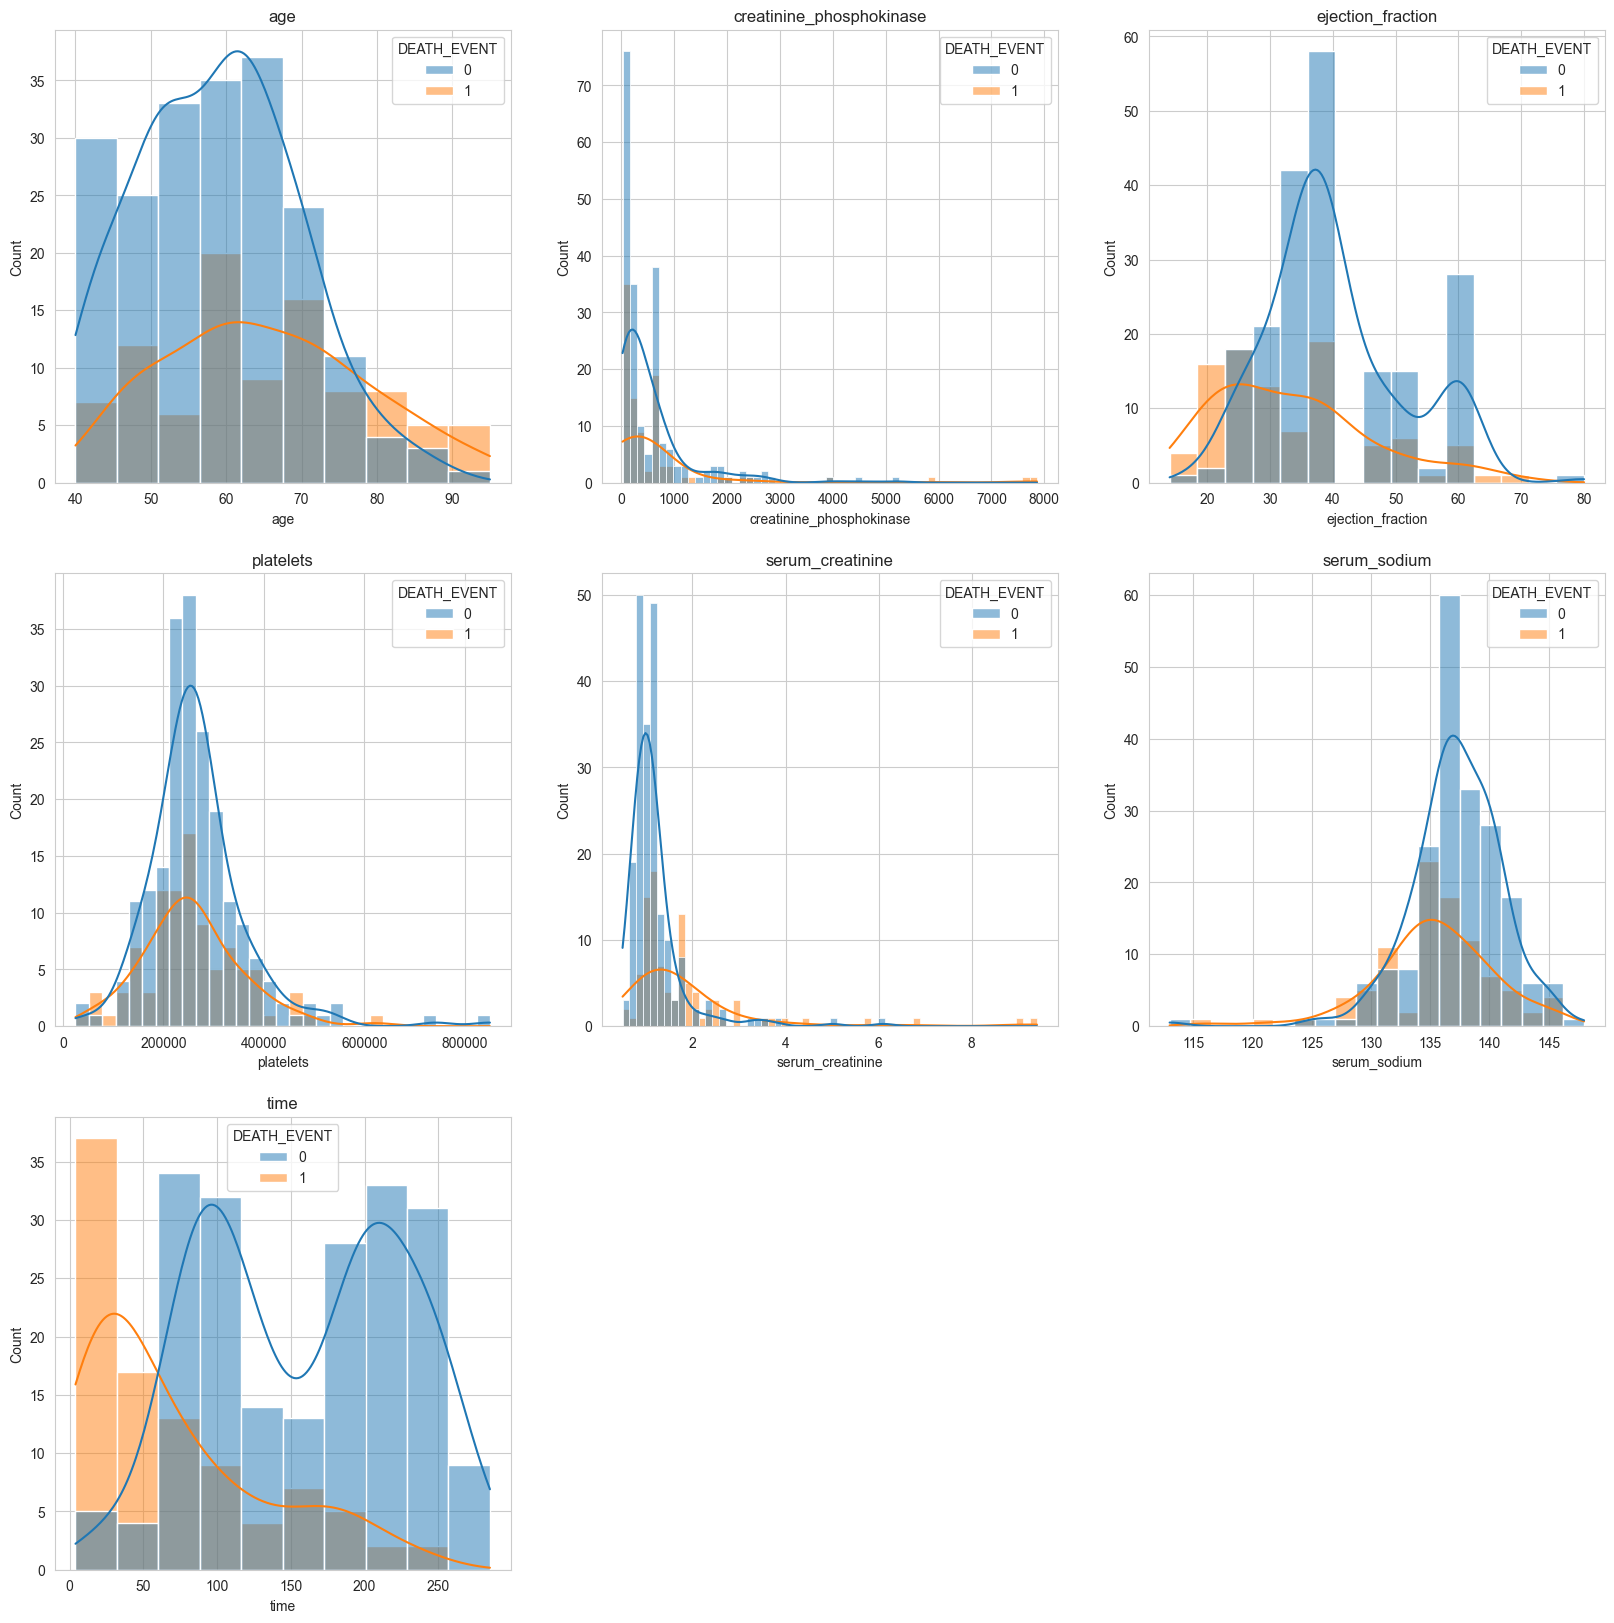

In [10]:
# Membuat histogram pada numeric_cols 
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df, x=col, hue='DEATH_EVENT', kde=True)
    plt.title(col)

### **Kesimpulan**

Berdasarkan histogram diatas, terdapat perbedaan karakteristik antara kelas 0 dan 1 pada atribut time dan ejection_fraction. Maka dari itu mari kita analisis lebih lanjut pada kedua atribut itu.

In [11]:
#fungsi untuk plotting dengan memisahkan data antara kelas 0 dan 1
def num_eda(data,feature,target,bins ):
    df_set_pos = data[data[target] == True].drop(target,axis = 1) #Untuk kelas 1 = Meninggal
    df_set_neg = data[data[target] == False].drop(target,axis = 1) #untuk kelas 0 = Alive

    #plot numerical data (Classification Task)
    fig, axes = plt.subplots(2,2,figsize = (18,4))

    #membuat visualisasi untuk melihat distribusinya
    ax1 = sns.histplot(x = feature,data = data,ax = axes[0,0],bins = bins,kde = True,edgecolor = "k",color = "orange")
    ax1.grid(linestyle='--', linewidth=0.5, color='gray')
    ax1.set_title(f"{feature} Distribution")
    
    #membuat visualisasi untuk melihat perbedaan antara kelas 0 dan 1
    ax2 = sns.histplot(x = feature,data = df_set_pos,ax = axes[0,1],bins = bins,label = "Death",kde = True,color = "red",linewidth = 0 )
    ax2_1 = sns.histplot(x = feature,data = df_set_neg,ax = axes[0,1],label = "Alive",bins = bins,kde = True,color = "green",linewidth = 0)
    ax2.grid(linestyle='--', linewidth=0.1, color='gray')
    ax2.set_title(f"{feature} Distribution by Target Class")
    ax2.legend()
    
    #membuat visualisasi boxplot untuk melihat outliers
    ax3 = sns.boxplot(x = feature,data = data,ax = axes[1,0],color = "orange")
    ax3.grid(linestyle='--', linewidth=0.5, color='gray')
    
    #membuat visualisasi untuk masing2 kelas 
    ax4 = sns.boxplot(x = feature,y = target,data = data,ax = axes[1,1],orient = "h",palette = ["green","red"])
    ax4.grid(linestyle='--', linewidth=0.1, color='gray')
    ax4.legend()

In [12]:
#Untuk mengantisipasi upddate packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


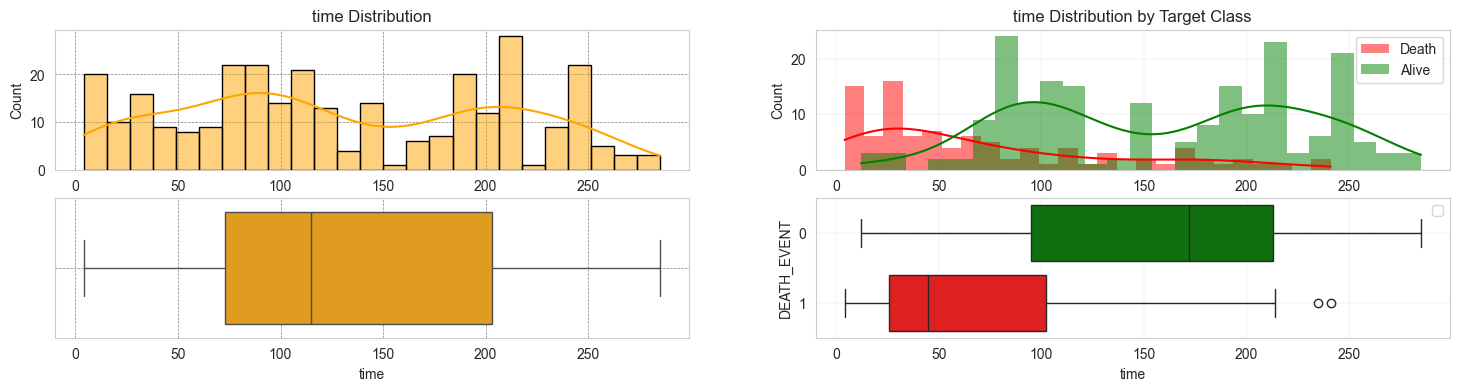

In [13]:
#Melihat visualisasi dari atribut time
num_eda(df,'time','DEATH_EVENT',25)

### **Kesimpulan**

Berdasarkan grafik disebelah kiri, atribut time memiliki data yang menyebar tidak ada kecenderungan pada suatu waktu dan tidak terdapat outliers. Berdasarkan grafik di sebelah kanan, dapat disimpulkan bahwa semain lama waktu penanganan maka semakin kecil peluang untuk pasien tersebut meninggal dan semakin besar peluang untuk pasien tersebut hidup dan juga pada kelas 0 tidak terdapat outliers, sedangkan kelas 1 memiliki outliers yang tidak berarti. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


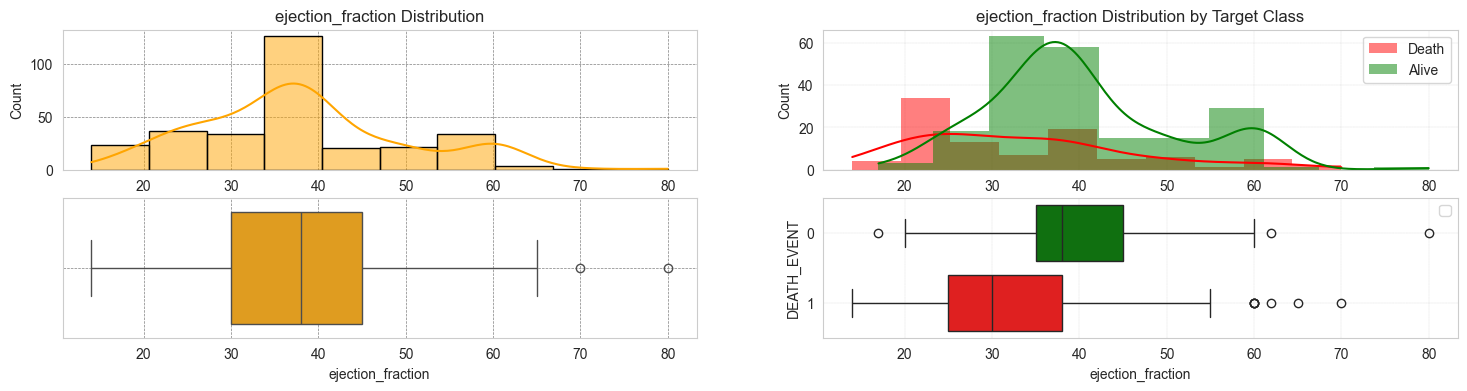

In [14]:
#Melihat visualisasi pada atribut ejection_fraction
num_eda(df,'ejection_fraction','DEATH_EVENT',10)

### **Kesimpulan**

Berdasarkan hasil grafik dikiri, didapat bahwa banyak pasien yang memiliki ejection_fraction disekitar 40an dan terdapat outliers pada atribut ejection_fraction. Sedangkan berdasarkan garfik dikanan, pasien yang meninggal memiliki ejection fraction lebih rendah dengan median 30 dan pasien yang hidup memiliki ejection fraction lebih tinggi dengan median 40. Maka dari itu dapat dikatakan bahwa semakin besar nilai ejection fraction maka semakin besar pula peluang untuk hidup

untuk fitur kategorikal, kita akan menggunakan chi-square test untuk mengetahui apakah fitur tersebut berpengaruh terhadap target atau tidak. 


Text(0.5, 1.0, 'DEATH_EVENT')

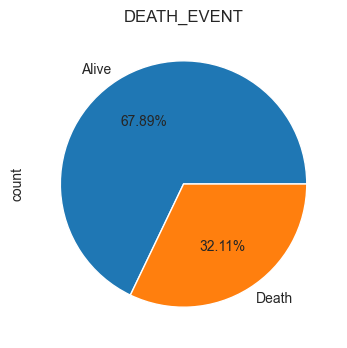

In [15]:
#plot pie chart for DEATH_EVENT untuk melihat death_event distribution
plt.figure(figsize=(4,4))
df['DEATH_EVENT'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['Alive', 'Death'])
plt.title('DEATH_EVENT')

### **Kesimpulan**

Berdasarkan hasil pie chart diatas, dapat dikatakan bahwa dataset memiliki proporsi kelas yang imbalance. Maka dari itu metric yang digunakan adalah F1 Score karena terdapat beberapa kasus yang sama dan menggunakan metric F1 Score

# **Data Preprocessing**

Data preprocessing yang akan dilakukna pada pemodelan ini antara lain:
1. Imputasi missing value pada masing masing kolom
2. Encoding categorical data menggunakan OneHotEncoder
3. Transformasi data menggunakan Yeo-johnson; transformasi yang sering digunakan untuk data yang inbalanced dan melakukan pendekatan terhadap distribusi normal
4. Melakukan resampling data menggunakan SMOTE karena biasanya dari berbagai macam resampling yang memberikan hasil paling bagus adalah SMOTE

In [16]:
# Melakukan pemrosesan data numerik
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #mengisi missing values dengan median karena median tidak dipengaruhi nilai ekstrem jadi lebih stabil
    ('scaler', PowerTransformer()) #dilakukan transformasi agar dapat mengatasi data dengan distribusi asimetri
])

# Melakukan pemrosesan data kategorik
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #mengisi missing values dengan nilai yang sering muncul jadi bersifat umum sehingga kecenderungan data tidak berubah
    ('onehot', TargetEncoder(random_state=42)) 
])

# Melakukan pemrosesan secara keseluruhan
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_cols), 
    ('categoric', categorical_pipeline, cat_cols)
],remainder='drop', #menghapus kolom yang tidak terproses secara numerik atau kategorik
verbose_feature_names_out=False).set_output(transform="pandas")

# Menampilkan proses pemrosesan datanya
preprocessor 

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  PowerTransformer())]),
                                 ['age', 'creatinine_phosphokinase',
                                  'ejection_fraction', 'platelets',
                                  'serum_creatinine', 'serum_sodium', 'time']),
                                ('categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  TargetEncoder(random_state=42))]),
                                 ['diabetes', 'high_blood_pressure', 'sex',
                                  'smoking', 'anaemia'])],
                  verbose_feature_names_out=False)

In [17]:
# Menggabungkan proses pemrosesan diatas dengan resampling untuk menangani ketidakseimbangan pada kelas 
smote = SMOTE(random_state=3000)
prep_smote = Pipeline([
    ('prep', preprocessor),
    ('smote', smote)
])
prep_smote

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   TargetEncoder(random_state=42))]),
                                                  ['diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking', 'anaemia'])],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE(random_state=3000))])

In [18]:
# Mendefinisikan variabel X dan y
X = df[cat_cols + num_cols]
y = df['DEATH_EVENT']

# Melakukan pembagian data training dan data testing, memakai 0,77 dan 0,33 karena datanya sedikit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=3000, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 12), (99, 12), (200,), (99,))

Karena jumlah data test yang sedikit, maka melakukan cross validation agar estimasi yang dihasilkan pun lebih stabil

In [19]:
# Model akan dievaluasi menggunakan Repeated Stratified K-Fold cross validation dengan 3 lipatan dan diulang 5 kali
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=3000)

# **Modeling**

Kandidat model yang akan digunakan adalah model ensemble seperti Random Forest, Gradient Boosting, AdaBoost, ExtraTrees dan Voting Classifier

In [20]:
# Membuat fungsi untuk mengevaluasi model berdasarkan nilai cross validation dan metrics F1 Score
def train_model(model, X_train, y_train, cv):
    scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    print('Mean F1 Score:', np.mean(scores))
    return scores

In [21]:
# Melakukan modelling 
rf = RandomForestClassifier(random_state=3000)
gb = GradientBoostingClassifier(random_state=3000)
ada = AdaBoostClassifier(random_state=3000)
et = ExtraTreesClassifier(random_state=3000)
vot = VotingClassifier([('rf', rf), ('gb', gb), ('ada', ada), ('et', et)], voting='soft')

# Menggabungkan model
models = [rf, gb, ada, et, vot]
models_name = ['Random Forest', 'Gradient Boosting', 'Ada Boost', 'Extra Trees', 'Voting Classifier']

# Looping untuk pemrosesan pada setiap model
for model, name in zip(models, models_name):
    model = Pipeline([
        ('prep', preprocessor),
        ('smote', smote),
        ('algo', model)
    ])
    print(name)
    train_model(model, X_train, y_train, cv)
    print('')

Random Forest


Mean F1 Score: 0.7310135011117842

Gradient Boosting
Mean F1 Score: 0.7053571374169201

Ada Boost
Mean F1 Score: 0.689321466832787

Extra Trees
Mean F1 Score: 0.7093811424254503

Voting Classifier
Mean F1 Score: 0.7140997655578103



Berdasarkan hasil modelling dan pemrosesan diatas didapat bahwa model yang memiliki nilai F1 Score paling tinggi adalah `Random Forest` dengan nilai 0.73101. Maka dari itu, yang dipilih adalah model Random Forest dan akan dilakukan evaluasi pada data test

In [22]:
# Memodelkan dan melatih model dengan data train
random_forest = Pipeline([
    ('prep', preprocessor),
    ('smote', smote),
    ('algo', rf)
])
random_forest.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   TargetEncoder(random_state=42))]),
                                                  ['diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking', 'anaemia'])],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE(random_state=3000)),
                ('algo', RandomForestClassifier(random_state=3000))])

# **Evaluasi**

In [23]:
# Melakukan evaluasi menggunakan data testing
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8841    0.9104    0.8971        67
           1     0.8000    0.7500    0.7742        32

    accuracy                         0.8586        99
   macro avg     0.8420    0.8302    0.8356        99
weighted avg     0.8569    0.8586    0.8573        99



### **Kesimpulan**

Berdasarkan hasil diatas dapat disimpulkan bahwa:
- `Precision, Recall dan F1-Score`, pada kelas 0 menunjukkan bahwa dari semua prediksi yang model lakukan untuk kelas 0, 88.41% benar-benar kelas 0; 91.04% menunjukkan bahwa dari semua instans kelas 0 yang sebenarnya, model berhasil mengidentifikai 91.04% dari mereka; 89.71% menunjukkan gambaran keseluruhan tentang performa model untuk kelas 0. Sedangkan pada kelas 1 menunjukkan bahwa dari semua prediksi yang model lakukan untuk kelas 1, 80% benar-benar kelas 1; 75% menunjukkan bahwa model berhasil mengidentifikasi 75% dari mereka; 77.42% memberikan gambaran keseluruhan tentang performa model untuk kelas 1. Dengan nilai-nilai tersebut dalam disimpulkan bahwa model memiliki kinerja yang baik untuk mengidentifikasi kelas 0 dengan precision, recall dan F1 Score yang tinggi.
- `Accuracy`; akurasi model secara keseluruhan adalah 85.86% 


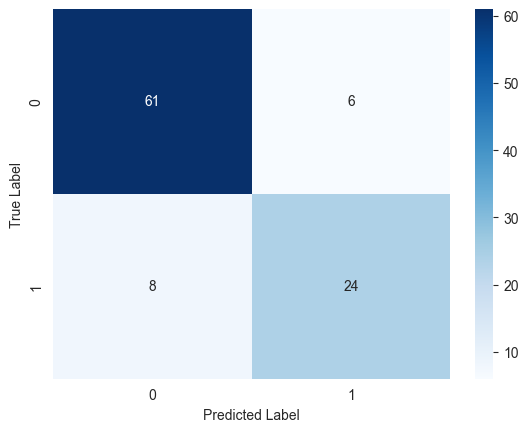

In [24]:
# Membuat plot confusion matrix untuk melihat gambaran model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

#set labels, title, and ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model memiliki performa yang baik dalam mengidentifikasi instance yang benar-benar milik kelas Positive. Namun, terdapat beberapa kesalahan dalam mengklasifikasikan instance yang seharusnya negatif sebagai positif dan instance yang seharusnya positif sebagai negatif


In [25]:
# Save final model untuk diuji
dump(random_forest, open('model_rf','wb'))

# **Model Inference**

In [26]:
# Membuat data baru
new_data = {
    "age": 75,
    "anaemia": 0,
    "creatinine_phosphokinase": 582,
    "diabetes": 0,
    "ejection_fraction": 20,
    "high_blood_pressure": 1,
    "platelets": 265000,
    "serum_creatinine": 1.9,
    "serum_sodium": 130,
    "sex" : 1,
    "smoking": 0,
    "time": 4
}

new_df = pd.DataFrame([new_data])
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000,1.9,130,1,0,4


In [27]:
# Pemodelan dan prediksi
model = load(open('model_rf', 'rb'))
model.predict(new_df)

array([1], dtype=int64)

# **Conclusion**

Berdasarkan analisis yang telah dilakukan :
- Pada `Data Eksplorasi`, didapat bahwa dataset ini memiliki 12 atribut dengan death_event sebagai targetnya. Dari ke-12 atribut tersebut yang memiliki keunikan dengan ketidaksamaan persebaran datanya adalah *time* dan *ejection_fraction*. Setelah kita analisis lebih lanjut ternyata **time memiliki hubungan yang berlawanan dengan peluang seseorang meninggal** yaitu ketika seseorang pengidap gagal jantung mempunyai waktu penanganan yang lama maka akan kecil kemungkinan dia meninggal dan sebaliknya. Sedangkan, **ejection_fraction memiliki hubungan yang linear dengan peluang seseorang meninggal** yaitu hampir semua orang yang meninggal memiliki ejection fraction rendah
- Pada `Modeling dan performa model`, model yang digunakan adalah Random Forest karena memiliki **F1 Score paling tinggi** dan selanjutnya dianalisis mengenai performa model menggunakan *classification report* yang berisi nilai precision, recall dan F1 Score. Model yang didapat mampu mengidentifikasi dengan baik pada kelas 0 dengan F1 Score sebesar 89.71% 